Zadanie rozgrzewkowe.
Napisać regresję dla wielu wymiarów.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("data_regression.csv", header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
from mpl_toolkits.mplot3d import Axes3D

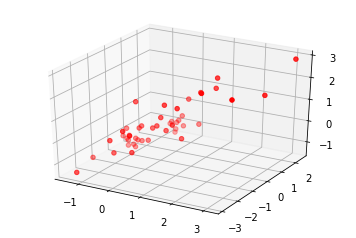

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Size"], data["Bedrooms"], data["Price"], zdir='z', c= 'red')


In [24]:
#data.insert(0, 'Ones', 1)

In [25]:
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [29]:
cols = data.shape[1]
x = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

x2 = np.matrix(x.values)
y2 = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))


In [34]:
alpha = 0.01
iters = 1000

In [35]:
def computeCost(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(x))

In [36]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(x)) * np.sum(term))
        
        theta = temp
        cost[i] = computeCost(x, y, theta)
        
    return theta, cost

In [37]:
g2, cost2 = gradientDescent(x2, y2, theta, alpha, iters)

In [38]:
computeCost(x2, y2, g2)

0.13070336960771892

Text(0.5,1,'Error vs. Training Epoch')

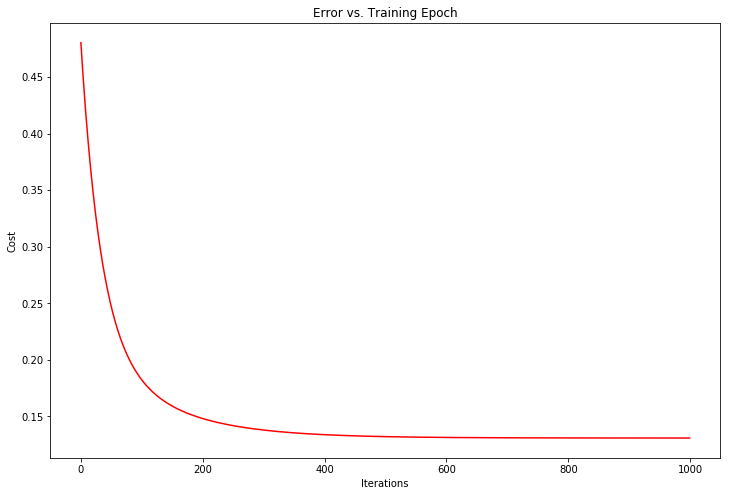

In [39]:
fig, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(np.arange(iters), cost2, 'r')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
ax2.set_title('Error vs. Training Epoch')

In [43]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x, y)

x = np.array(x[:, 1].A1)
f = model.predict(x).flatten()

fig, ax3 = plt.subplots(figsize=(12,8))
ax3.plot(x, f, 'r', label='Prediction')
ax3.scatter(data.Population, data.Profit, label='Traning Data')
ax3.legend(loc=2)
ax3.set_xlabel('Population')
ax3.set_ylabel('Profit')
ax3.set_title('Predicted Profit vs. Population Size')

TypeError: unhashable type: 'slice'